## fancy softmax function
## 여러개의 클래스가 있을 때 예측할 때

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 환경을 여러가지로 해주기 위함
tf.set_random_seed(777)

In [4]:
xy = np.loadtxt('data-04-zoo.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

nb_classes = 7

In [5]:
X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])
# onehot은 0부터 시작한다 0 ~ 6
Y_one_hot = tf.one_hot(Y, nb_classes)
# 1차원 더 크게 돼서 1차원을 줄여줘야 한다. reshape해줘야한다.
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes]) 

In [6]:
W = tf.Variable(tf.random_normal([16, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

In [7]:
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

In [8]:
# 푼 것과 y_one_hot 정답과 비교
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                labels=tf.stop_gradient([Y_one_hot]))
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [9]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Step:     0	Loss: 5.106	Acc: 37.62%
Step:   100	Loss: 0.800	Acc: 79.21%
Step:   200	Loss: 0.486	Acc: 88.12%
Step:   300	Loss: 0.349	Acc: 90.10%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction:

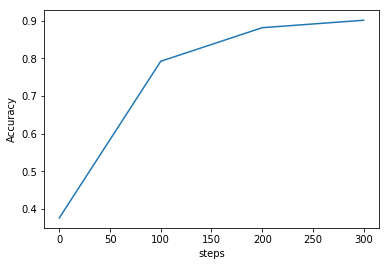

[[41  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 1  1  1  1  1  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  7  1]
 [ 0  4  0  0  0  1  5]]


In [24]:
accuracy_val = []
steps = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(301):
        sess.run(optimizer, feed_dict = {X:x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict = {
                X:x_data, Y:y_data})
            accuracy_val.append(acc)
            steps.append(step)
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
           
    pred = sess.run(prediction, feed_dict={X:x_data})
    #flattern은 2차원을 1차원으로
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
        
    print(Y_one_hot)
        
    # acurracy 그래프 그리기
    plt.plot(steps, accuracy_val)
    plt.xlabel('steps')
    plt.ylabel('Accuracy')
    plt.show()
    
    # confusion matrix 출력

con = tf.confusion_matrix(labels= y_data.flatten(), predictions = pred, num_classes= nb_classes)

#     print(con)
sess = tf.Session()
with sess.as_default():
    print(sess.run(con))
#     tf.confusion_matrix(
#         labels,
#         predictions,
#         num_classes=None,
#         dtype=tf.int32,
#         name=None,
#         weights=None
#     )
    
    
    # 데이터를 학습데이터 검증데이터 나눠서 하기